In [1]:
import matplotlib.puplot as plt
import numpy as np
from PIL import Image

ModuleNotFoundError: No module named 'matplotlib.puplot'

In [36]:
img = Image.open(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\CT_dataset -y3_ Copy\B\ct_img2.png')
img = np.array(img)

fig, ax = plt.subplots()
im = ax.imshow(img, cmap='gray')
plt.colorbar(im)

def onclick(event):
    if event.inaxes == ax:
        x = int(event.xdata)
        y = int(event.ydata)
        pixel_value = img[y, x]
        print(f"Pixel value at ({x}, {y}): {pixel_value:.2f}")


fig.canvas.mpl_connect('button_press_event', onclick)

14

In [35]:
%matplotlib tk
plt.show()

In [41]:
%matplotlib inline

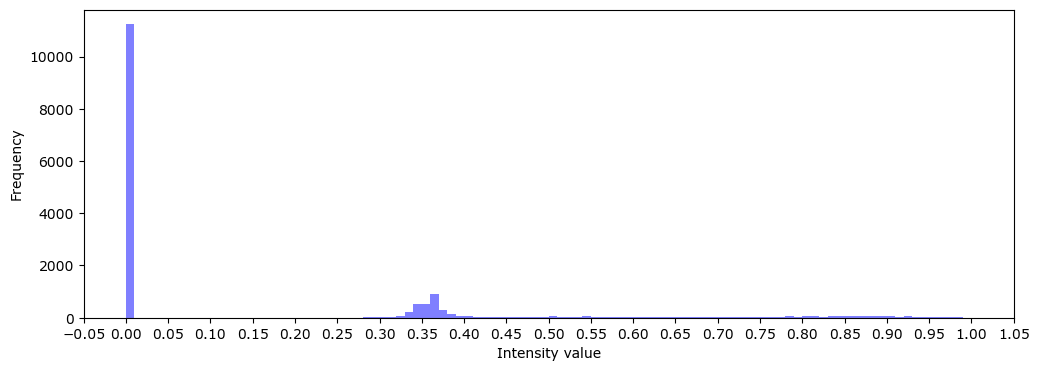

In [24]:
#histograms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the CT image using PIL
img = Image.open(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\CT_dataset -y3_ Copy\B\ct_img2.png') # Convert to grayscale

# Convert the PIL image to a numpy array
img = np.array(img)
img_normalized=(img - np.min(img)) / (np.max(img) - np.min(img))
# Plot the histogram
plt.figure(figsize=(12, 4))
ax = plt.gca()
ax.hist(img_normalized.ravel(), bins=100, range=(0, 1), color='blue', alpha=0.5)
ax.set_xlabel('Intensity value')
ax.set_ylabel('Frequency')
num_ticks = 25
ax.xaxis.set_major_locator(plt.MaxNLocator(num_ticks))

# Show the plot
plt.show()



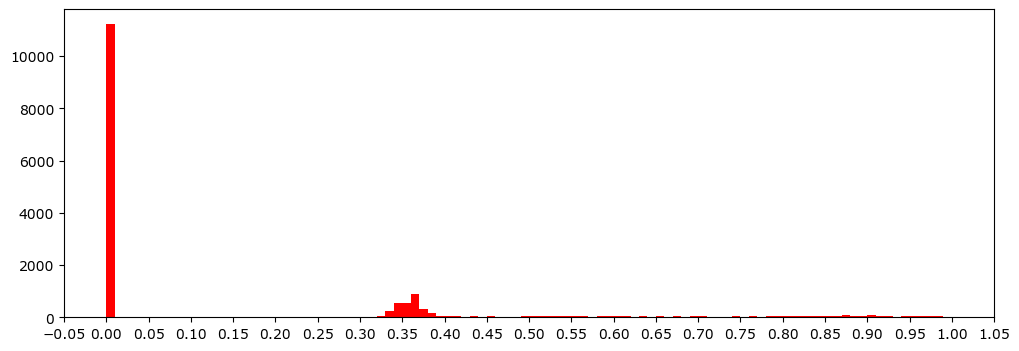

In [20]:
bin_edges = np.linspace(0, 1, 101)
h, _ = np.histogram(img_normalized, bins=bin_edges)
barw = bin_edges[1]-bin_edges[0] 
plt.figure(figsize=(12, 4))
ax = plt.gca()

# Plot the data
ax.bar(bin_edges[:-1], h, width=barw, align='edge', color='r')

# Set the number of ticks on the x-axis to 20
num_ticks = 25
ax.xaxis.set_major_locator(plt.MaxNLocator(num_ticks))

# Show the plot
plt.show()

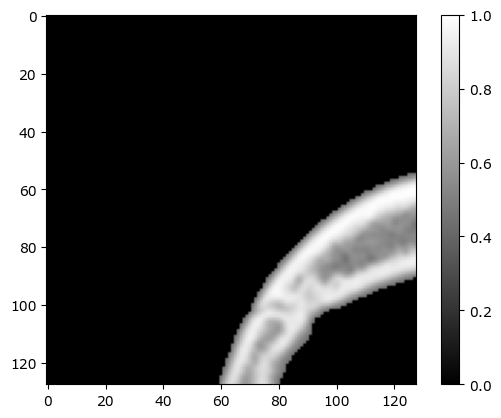

In [45]:
img = Image.open(r'C:\Users\Xiaowei\Desktop\Clara\CycleGAN\Datasets\CT_dataset -y3_ Copy\B\ct_img3.png')
img = np.array(img)
img = (img - np.min(img)) / (np.max(img) - np.min(img))

low_value = 0
high_value = 0.45

img[0:128,0:128][(img[0:128, 0:128] >= low_value) & (img[0:128,0:128] <= high_value)] = 0

fig, ax = plt.subplots()
im = ax.imshow(img, cmap='gray')
plt.colorbar(im)


plt.show()



In [39]:
np.shape(img)

(128, 128)

In [54]:
def remove_brain(img):
    img = np.array(img)
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    
    low_value = 0.25
    high_value = 0.425

    img[0:128,0:128][(img[0:128, 0:128] >= low_value) & (img[0:128,0:128] <= high_value)] = 0
    return img

In [55]:
import os
from PIL import Image
# getting all the validation images

path = 'C:\\Users\\Xiaowei\\Desktop\\Clara\\CycleGAN\\Datasets\\CT_dataset -y3_ Copy\\B_old\\'
save_path = 'C:\\Users\\Xiaowei\\Desktop\\Clara\\CycleGAN\\Datasets\\CT_dataset -y3_ Copy\\B\\'
for filename in os.listdir(path):
    if filename.endswith('.png'):
        img = plt.imread(path+filename)
        no_brain_img = remove_brain(img)
        image = Image.fromarray((no_brain_img * 255).astype(np.uint8))
        image.save(save_path+filename)
       
